# `eda_baseline.ipynb`

Purpose: Quick, structured overview of the dataset — no heavy modelling

## Setup:

### 1. Install and load libraries

In [1]:
install.packages(c("tidyverse", "readr", "lubridate", "janitor"))

Installing packages into 'C:/Users/James/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\James\AppData\Local\R\win-library\4.5\00LOCK\readr\libs\x64\readr.dll to C:\Users\James\AppData\Local\R\win-library\4.5\readr\libs\x64\readr.dll: Permission denied"
Warning message:
"restored 'readr'"


package 'lubridate' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lubridate'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\James\AppData\Local\R\win-library\4.5\00LOCK\lubridate\libs\x64\lubridate.dll to C:\Users\James\AppData\Local\R\win-library\4.5\lubridate\libs\x64\lubridate.dll: Permission denied"
Warning message:
"restored 'lubridate'"


package 'janitor' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\James\AppData\Local\Temp\RtmpKofgWL\downloaded_packages


In [2]:
library(tidyverse)
library(readr)
library(lubridate)
library(janitor)

Warning message:
"package 'tidyverse' was built under R version 4.5.1"
Warning message:
"package 'ggplot2' was built under R version 4.5.1"
Warning message:
"package 'tibble' was built under R version 4.5.1"
Warning message:
"package 'tidyr' was built under R version 4.5.1"
Warning message:
"package 'readr' was built under R version 4.5.1"
Warning message:
"package 'purrr' was built under R version 4.5.1"
Warning message:
"package 'dplyr' was built under R version 4.5.1"
Warning message:
"package 'stringr' was built under R version 4.5.1"
Warning message:
"package 'forcats' was built under R version 4.5.1"
Warning message:
"package 'lubridate' was built under R version 4.5.1"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ──────────────────────────────────────

### 2. Load data

In [3]:
# Read core tables
orders <- read_csv("data/orders.csv")
order_items <- read_csv("data/order_items.csv")
items <- read_csv("data/items.csv")
suppliers <- read_csv("data/suppliers.csv")
customers <- read_csv("data/customers.csv")
inventory_history <- read_csv("data/inventory_history.csv")
fulfillment_log <- read_csv("data/fulfillment_log.csv")

Rows: 20129 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): order_status
dbl  (2): order_id, customer_id
date (1): order_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 60847 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (6): order_item_id, order_id, item_id, supplier_id, quantity, fulfilled...
date (1): fulfilled_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 50 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, category
dbl (2): item_id, unit_price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or

### 3. Glimpsing at Data and Cleanliness Check

In [4]:
glimpse(orders)
summary(order_items)
suppliers %>% tabyl(category)
items %>% count(category) %>% arrange(desc(n))

Rows: 20,129
Columns: 4
$ order_id     <dbl> 25, 74, 86, 46, 58, 1, 97, 4, 2, 87, 7, 13, 21, 18, 10, 2…
$ customer_id  <dbl> 123, 88, 146, 142, 90, 110, 82, 177, 90, 138, 138, 111, 1…
$ order_date   <date> 2025-08-01, 2025-08-02, 2025-08-02, 2025-08-02, 2025-08-…
$ order_status <chr> "fulfilled", "fulfilled", "fulfilled", "fulfilled", "fulf…


 order_item_id      order_id        item_id       supplier_id    
 Min.   :    1   Min.   :    1   Min.   : 1.00   Min.   : 1.000  
 1st Qu.:15212   1st Qu.: 5035   1st Qu.:13.00   1st Qu.: 3.000  
 Median :30424   Median :10101   Median :25.00   Median : 6.000  
 Mean   :30424   Mean   :10081   Mean   :25.46   Mean   : 5.431  
 3rd Qu.:45636   3rd Qu.:15110   3rd Qu.:38.00   3rd Qu.: 8.000  
 Max.   :60847   Max.   :20129   Max.   :50.00   Max.   :10.000  
                                                                 
    quantity    fulfilled_quantity fulfilled_date      
 Min.   :1.00   Min.   :0.000      Min.   :2025-08-01  
 1st Qu.:2.00   1st Qu.:1.000      1st Qu.:2025-11-04  
 Median :3.00   Median :3.000      Median :2026-02-08  
 Mean   :3.01   Mean   :2.518      Mean   :2026-02-07  
 3rd Qu.:4.00   3rd Qu.:4.000      3rd Qu.:2026-05-14  
 Max.   :5.00   Max.   :5.000      Max.   :2026-08-17  
                                   NA's   :9352        

category,n,percent
<chr>,<int>,<dbl>
Clothing,2,0.2
Electronics,2,0.2
Food,2,0.2
Hardware,2,0.2
Medical,2,0.2


category,n
<chr>,<int>
Electronics,13
Food,12
Clothing,11
Medical,10
Hardware,4


## Basic EDA

### 1. Order Status Overview

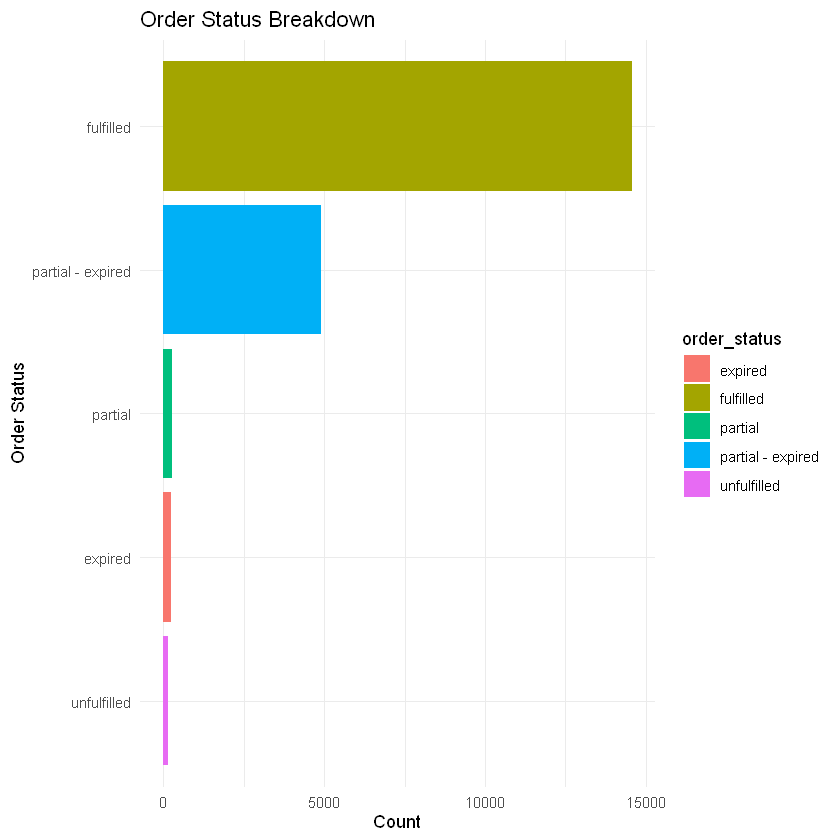

In [5]:
orders %>%
  count(order_status) %>%
  ggplot(aes(x = reorder(order_status, n), y = n, fill = order_status)) +
  geom_col() +
  coord_flip() +
  labs(title = "Order Status Breakdown", x = "Order Status", y = "Count") +
  theme_minimal()

Not many orders flat out expired (no items within the order were fulfilled). I'll combine those in the next plot with the 'partial - expired' orders. I'll also combine the 'unfulfilled' and 'partial' orders as 'Ongoing' as they're not of particular interest to our goal.

### 2. Order Items Fulfillment Success

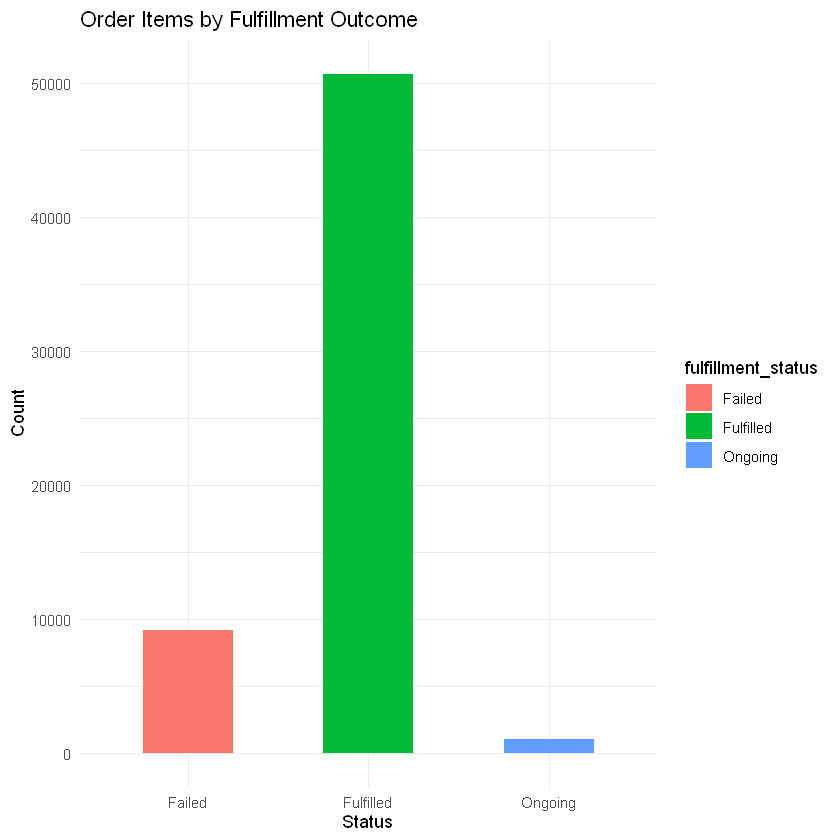

In [6]:
# Get the cutoff date
cutoff_date <- max(orders$order_date, na.rm = TRUE) - days(14)

order_items %>%
  left_join(orders, by = "order_id") %>%
  mutate(
    fulfillment_status = case_when(
      fulfilled_quantity == quantity ~ "Fulfilled",
      order_date <= cutoff_date      ~ "Failed",     # not fully fulfilled & too old
      TRUE                           ~ "Ongoing"
    )
  ) %>%
  count(fulfillment_status) %>%
  ggplot(aes(x = fulfillment_status, y = n, fill = fulfillment_status)) +
  geom_col(width = 0.5) +
  labs(
    title = "Order Items by Fulfillment Outcome",
    x = "Status",
    y = "Count"
  ) +
  theme_minimal()


I'll exclude those 'Ongoing' orders in our modelling notebook and focus on mostly those 'Failed' orders to see what went wrong from the suppliers perspective.

### 3. Fulfillment Attempt Successes

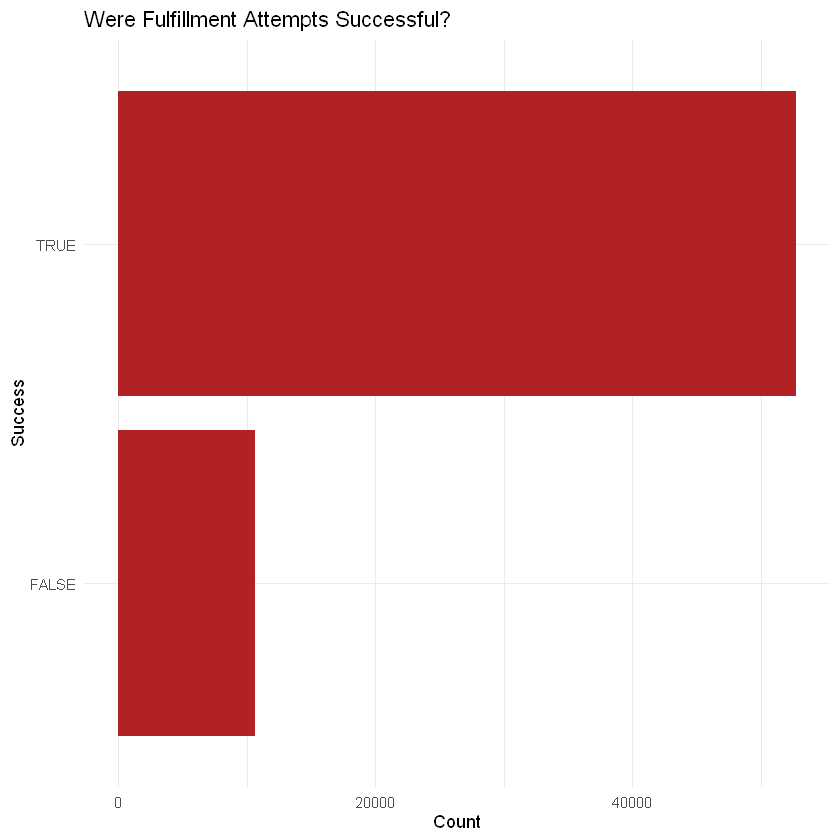

In [7]:
fulfillment_log %>%
  count(failure_reason, sort = TRUE) %>%
  ggplot(aes(x = reorder(is.na(failure_reason), n), y = n)) +
  geom_col(fill = "firebrick") +
  coord_flip() +
  labs(title = "Were Fulfillment Attempts Successful?", x = "Success", y = "Count") +
  theme_minimal()


Most fulfillment attempts within the simulation were successful, but there are a good amount of unsuccessful attempts to work with.